In [1]:
# import packages
import pandas as pd
import numpy as np
import math
import geopandas as gpd
from shapely.geometry import MultiPolygon
import folium
from folium import Choropleth, Marker, Circle
from folium.plugins import HeatMap, MarkerCluster

In [2]:
# read in crash data reported by Raleigh Police Department
crashes = gpd.read_file(r"Reported_Crash_Locations_2020_Onwards.geojson")
crashes.head()

OBJECTID  key_crash                DateOfCrash   LocalUse  \
0    125466     249375  2020-01-01T11:12:00+00:00  P20000010   
1    125467     249376  2020-01-01T11:46:00+00:00  P20000015   
2    125468     249377  2020-01-01T13:55:00+00:00  P20000036   
3    125470     249379  2020-01-01T13:28:00+00:00  P20000034   
4    125473     249382  2020-01-01T14:38:00+00:00  P20000045   

               LocationRelationToRoad LocationInNearIndicator LocationCity  \
0  On Roadway (Surface) / Off Roadway                      In      RALEIGH   
1  On Roadway (Surface) / Off Roadway                      In      RALEIGH   
2  On Roadway (Surface) / Off Roadway                      In      RALEIGH   
3  On Roadway (Surface) / Off Roadway                      In      RALEIGH   
4  On Roadway (Surface) / Off Roadway                      In      RALEIGH   

  LocationRoadNameOn LocationRampIndicator LocationFeetFromRoad  ...  \
0        N DAWSON ST                    No                  270  ...   
1   VALLEY STREAM DR                    No                  200  ...   
2    WAKE  FOREST RD                    No                    0  ...   
3       CAPITAL BLVD                    No                   50  ...   
4                 40                    No                       ...   

  unknown_person_type killed type_a_injury type_b_injury type_c_injury  \
0                   0    0.0           0.0             0             0   
1                   0    0.0           0.0             0             0   
2                   0    0.0           0.0             1             3   
3                   1    0.0           0.0             0             0   
4                   0    0.0           0.0             0             0   

  no_injury injury_unknown LocationLatitude LocationLongitude  \
0         4              0         35.77900         -78.64330   
1         2              0         35.84233         -78.56756   
2         2              0         35.83963         -78.61162   
3         1              0         35.80084         -78.62468   
4         5              0         35.82290         -78.74790   

                     geometry  
0  POINT (-78.64330 35.77900)  
1  POINT (-78.56756 35.84233)  
2  POINT (-78.61162 35.83963)  
3  POINT (-78.62468 35.80084)  
4  POINT (-78.74790 35.82290)  

[5 rows x 47 columns]

In [3]:
crashes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 42663 entries, 0 to 42662
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   OBJECTID                   42663 non-null  int64   
 1   key_crash                  42663 non-null  int64   
 2   DateOfCrash                42663 non-null  object  
 3   LocalUse                   42663 non-null  object  
 4   LocationRelationToRoad     42663 non-null  object  
 5   LocationInNearIndicator    42663 non-null  object  
 6   LocationCity               42663 non-null  object  
 7   LocationRoadNameOn         42663 non-null  object  
 8   LocationRampIndicator      42663 non-null  object  
 9   LocationFeetFromRoad       42663 non-null  object  
 10  LocationMilesFromRoad      42663 non-null  object  
 11  LocationDirectionFromRoad  42663 non-null  object  
 12  LocationAtFromIndicator    42663 non-null  object  
 13  LocationRoadNameAt     

In [4]:
crashes.LocationCity.value_counts()

RALEIGH              42613
CARY                    18
KNIGHTDALE               9
WAKE FOREST              3
RALIEGH                  2
RAK                      2
RALI                     2
GARNER                   2
RALEGIH                  1
WESTGATE RD              1
ALEIGH                   1
RALEIGHH                 1
MORRISVILLE              1
DURHAM                   1
RAKL                     1
FALLS OF NEUSE RD        1
RLAEIGH                  1
RALEIGJH                 1
RAEIGH                   1
RALEIH                   1
Name: LocationCity, dtype: int64

In [5]:
crashes[['LocationLatitude', 'LocationLongitude']].describe()

LocationLatitude  LocationLongitude
count      42663.000000       42663.000000
mean          35.816275         -78.604400
std            0.676711           1.247757
min            3.733900         -79.714810
25%           35.779200         -78.677400
50%           35.815100         -78.628000
75%           35.855300         -78.587200
max           85.832300          -7.581740

In [6]:
crashes.Crash_Date_Year.value_counts()

2021    20481
2020    17286
2022     4896
Name: Crash_Date_Year, dtype: int64

In [7]:
# create a heatmap of the crash data set
m = folium.Map(location=[35.7997, -78.5694], zoom_start=11) 

HeatMap(data=crashes[['LocationLatitude', 'LocationLongitude']], radius=12).add_to(m)

# Show the map
m

In [8]:
# read in hospital location data for Wake County and surrounding areas
hospitals = gpd.read_file(r"Hospitals%2C_Wake_County_and_Surrounding.geojson")
hospitals

OBJECTID  ID                  ADDRESS  FACILITY         CITY  \
0        357   0        3000 New Bern Ave  Hospital      Raleigh   
1        358   0      3400 Wake Forest Rd  Hospital      Raleigh   
2        359   0       4420 Lake Boone Tr  Hospital      Raleigh   
3        360   0    1900 Kildaire Farm Rd  Hospital         Cary   
4        361   0  10000 Falls of Neuse Rd  Hospital      Raleigh   
5        362   0    8001 T W Alexander Dr     Other      Raleigh   
6        363   0       120 Healthplex Way     Other         Apex   
7        364   0        3643 N Roxboro Rd  Hospital       Durham   
8        365   0            2301 Erwin Rd  Hospital       Durham   
9        366   0    509 N Brightleaf Blvd  Hospital   Smithfield   
10       367   0           101 Manning DR  Hospital  Chapel Hill   
11       368   0         2138 NC Hwy 42 W     Other      Clayton   
12       641   0       215 Brightwater Dr  Hospital   Lillington   
13       642   0          800 Tilghman Dr  Hospital         Dunn   
14       643   0          1010 College St  Hospital       Oxford   
15       644   0            508 Fulton St  Hospital       Durham   
16       645   0          400 US 70 Hwy E     Other       Garner   

                              NAME          SERVICES     COUNTY    POINT_X  \
0           WakeMed Raleigh Campus  Emergency/Trauma       Wake -78.588016   
1     Duke Health Raleigh Hospital         Emergency       Wake -78.618621   
2                   Rex Healthcare         Emergency       Wake -78.702774   
3            WakeMed Cary Hospital         Emergency       Wake -78.781516   
4         WakeMed North Healthplex         Emergency       Wake -78.597981   
5   WakeMed Brier Creek Healthplex         Emergency       Wake -78.783455   
6          WakeMed Apex Healthplex         Emergency       Wake -78.868000   
7         Durham Regional Hospital         Emergency     Durham -78.896590   
8         Duke University Hospital  Emergency/Trauma     Durham -78.935308   
9     Johnston Memorial Smithfield         Emergency   Johnston -78.333144   
10           N C Memorial Hospital  Emergency/Trauma     Orange -79.049115   
11       Johnston Memorial Clayton         Emergency   Johnston -78.503275   
12        Central Harnett Hospital         Emergency    Harnett -78.809343   
13     Betsy Johnson Regional Hosp         Emergency    Harnett -78.634737   
14        Granville Medical Center         Emergency  Granville -78.593408   
15        Durham VA Medical Center         Emergency     Durham -78.938000   
16       WakeMed Garner Healthplex         Emergency       Wake -78.596347   

      POINT_Y                    geometry  
0   35.784702  POINT (-78.58802 35.78471)  
1   35.828792  POINT (-78.61862 35.82880)  
2   35.817613  POINT (-78.70278 35.81762)  
3   35.740016  POINT (-78.78152 35.74002)  
4   35.909229  POINT (-78.59798 35.90924)  
5   35.917703  POINT (-78.78346 35.91771)  
6   35.739000  POINT (-78.86763 35.73893)  
7   36.037930  POINT (-78.89659 36.03794)  
8   36.007920  POINT (-78.93531 36.00793)  
9   35.514403  POINT (-78.33315 35.51441)  
10  35.904312  POINT (-79.04912 35.90432)  
11  35.630255  POINT (-78.50328 35.63026)  
12  35.424589  POINT (-78.80935 35.42460)  
13  35.306830  POINT (-78.63384 35.30649)  
14  36.326279  POINT (-78.59392 36.32615)  
15  36.009000  POINT (-78.93757 36.00923)  
16  35.699031  POINT (-78.59635 35.69904)

In [9]:
# create map of hospital locations
m = folium.Map(location=[35.7997, -78.5694], zoom_start=10) 

# Visualize the hospital locations
hospitals.apply(lambda row: Marker([row['POINT_Y'], row['POINT_X']], popup=row['NAME']).add_to(m), axis=1)
        
# Show the map
m

In [10]:
# read in Council District geographic data of Raleigh
# will use this to focus solely on the city of Raleigh rather than all of Wake County
council_districts = gpd.read_file(r"Raleigh_City_Council_Districts.geojson")
council_districts

OBJECTID COUNCIL_DIST    COUNCIL_PERSON   SHAPE_Length    SHAPE_Area  \
0         1            A   Patrick Buffkin  329950.069408  7.792230e+08   
1         2            B         David Cox  726939.534192  7.399844e+08   
2         3            C      Corey Branch  621867.351583  8.602896e+08   
3         4            D  Stormie D. Forte  403953.226524  7.770446e+08   
4         5            E      David Knight  541393.584291  1.012458e+09   

                                            geometry  
0  MULTIPOLYGON (((-78.67249 35.91053, -78.67279 ...  
1  MULTIPOLYGON (((-78.55426 35.96912, -78.55485 ...  
2  MULTIPOLYGON (((-78.56022 35.73295, -78.56072 ...  
3  MULTIPOLYGON (((-78.68452 35.74260, -78.68452 ...  
4  MULTIPOLYGON (((-78.76872 35.91166, -78.76901 ...

In [11]:
# visualize the city boundaries of Raleigh
m = folium.Map(location=[35.7997, -78.5694], zoom_start=11) 

folium.GeoJson(council_districts).add_to(m)

m

In [12]:
# what is the corresponding crs for each of the tables?
print(crashes.crs)
print(hospitals.crs)
print(council_districts.crs)

epsg:4326
epsg:4326
epsg:4326


In [13]:
# select key variables to reduce table complexity
crash_trim = crashes[['key_crash', 'Crash_Date_Year', 'LocationCity', 'LocationLatitude', "LocationLongitude", 'geometry']]
crash_trim.shape

(42663, 6)

In [14]:
# filter out instances that have missing geometry
# keep data from 2020 onwards
# already did this to shrink the initial size of crashes
# crash_trim = crash_trim[(~crash_trim.geometry.isnull()) & (crash_trim.Crash_Date_Year >= 2020)]
# crash_trim.shape

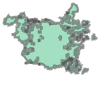

In [15]:
# create a single shape to represent Raleigh from council_districts
council_union = council_districts.geometry.unary_union
council_union

In [16]:
# select only crashes within Raleigh
raleigh_crashes = crash_trim.loc[crash_trim["geometry"].apply(lambda x: council_union.contains(x))]
raleigh_crashes.head()

key_crash  Crash_Date_Year LocationCity  LocationLatitude  \
0     249375             2020      RALEIGH          35.77900   
1     249376             2020      RALEIGH          35.84233   
2     249377             2020      RALEIGH          35.83963   
3     249379             2020      RALEIGH          35.80084   
4     249382             2020      RALEIGH          35.82290   

   LocationLongitude                    geometry  
0          -78.64330  POINT (-78.64330 35.77900)  
1          -78.56756  POINT (-78.56756 35.84233)  
2          -78.61162  POINT (-78.61162 35.83963)  
3          -78.62468  POINT (-78.62468 35.80084)  
4          -78.74790  POINT (-78.74790 35.82290)

In [17]:
raleigh_crashes.shape

(40870, 6)

In [18]:
# noticing that some values in LocationLatitude and LocationLongitude don't make sense, and don't 
# correspond to the values in geometry
raleigh_crashes.sort_values(by='LocationLatitude').head()

key_crash  Crash_Date_Year LocationCity  LocationLatitude  \
18847     269676             2021      RALEIGH           3.73390   
38239     290276             2022      RALEIGH           5.77667   
5224      249850             2020      RALEIGH           5.78000   
34358     286242             2021      RALEIGH           5.81968   
5226      250021             2020      RALEIGH           5.90246   

       LocationLongitude                    geometry  
18847          -78.65070  POINT (-78.65070 35.73390)  
38239          -78.58225  POINT (-78.58225 35.77667)  
5224           -78.75060  POINT (-78.75060 35.78000)  
34358          -78.62347  POINT (-78.62347 35.81968)  
5226           -78.81064  POINT (-78.81064 35.90246)

In [19]:
# create new Latitude and Longitude variables using the values in geometry
raleigh_crashes['Latitude'] = raleigh_crashes.geometry.y
raleigh_crashes['Longitude'] = raleigh_crashes.geometry.x

raleigh_crashes.head()

C:\ProgramData\Anaconda3\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


key_crash  Crash_Date_Year LocationCity  LocationLatitude  \
0     249375             2020      RALEIGH          35.77900   
1     249376             2020      RALEIGH          35.84233   
2     249377             2020      RALEIGH          35.83963   
3     249379             2020      RALEIGH          35.80084   
4     249382             2020      RALEIGH          35.82290   

   LocationLongitude                    geometry  Latitude  Longitude  
0          -78.64330  POINT (-78.64330 35.77900)  35.77900  -78.64330  
1          -78.56756  POINT (-78.56756 35.84233)  35.84233  -78.56756  
2          -78.61162  POINT (-78.61162 35.83963)  35.83963  -78.61162  
3          -78.62468  POINT (-78.62468 35.80084)  35.80084  -78.62468  
4          -78.74790  POINT (-78.74790 35.82290)  35.82290  -78.74790

In [20]:
# need to convert tables to new crs for the region
# this crs is in meters
hospitals = hospitals.to_crs(epsg=32119)
raleigh_crashes = raleigh_crashes.to_crs(epsg=32119)

### Assuming I can walk 1 mile (~1.6km) in 15 minutes, a 15 Minute City would have healthcare within a 1.6 km radius (ideally I would have data on Urgent Care locations but that is not readily available)
### Let's be veryyy leniet and strive for a 45 minute city though, and set a radius of 3 miles (4.8 km)

In [21]:
# create a heatmap of the Raleigh crashes, and a 3 mile buffer zone around each hosptial
m = folium.Map(location=[35.7997, -78.5694], zoom_start=11) 

HeatMap(data=raleigh_crashes[['Latitude', 'Longitude']], radius=12).add_to(m)

# Visualize the hospital locations
hospitals.apply(lambda row: Marker([row['POINT_Y'], row['POINT_X']], popup=row['NAME']).add_to(m), axis=1)
# create buffer zone for each hosptial
coverage = gpd.GeoDataFrame(geometry=hospitals.geometry).buffer(4800)
# add the buffer zones to the map, after changing the crs back to Lon/Lat
folium.GeoJson(coverage.geometry.to_crs(epsg=4326)).add_to(m)
# include the ability for Lat/Lon to appear on whatever location you click
folium.LatLngPopup().add_to(m)

# Show the map
m

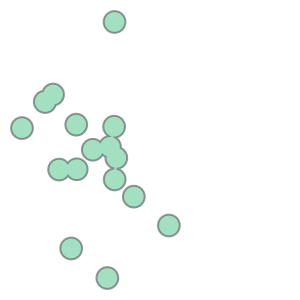

In [22]:
# create a collective shape that represents a 3 mile buffer around each hospital
hospital_buffer = hospitals.geometry.buffer(4800)
hospital_buffer_poly = hospital_buffer.geometry.unary_union
hospital_buffer_poly

In [23]:
# what is the area in square kilometers
hospital_buffer_poly.area / 1000**2

1093.4115080983702

In [24]:
# select crashes that happened outside of our 3 mile hospital radius
outside_range = raleigh_crashes.loc[~raleigh_crashes["geometry"].apply(lambda x: hospital_buffer_poly.contains(x))]
outside_range.head()

key_crash  Crash_Date_Year LocationCity  LocationLatitude  \
0      249375             2020      RALEIGH          35.77900   
1      249376             2020      RALEIGH          35.84233   
5      249384             2020      RALEIGH          35.86000   
12     249393             2020      RALEIGH          35.78846   
16     249397             2020      RALEIGH          35.86900   

    LocationLongitude                       geometry  Latitude  Longitude  
0           -78.64330  POINT (641849.018 225138.925)  35.77900  -78.64330  
1           -78.56756  POINT (648665.742 232192.341)  35.84233  -78.56756  
5           -78.53900  POINT (651236.603 234164.391)  35.86000  -78.53900  
12          -78.64761  POINT (641455.640 226187.073)  35.78846  -78.64761  
16          -78.57140  POINT (648306.075 235149.803)  35.86900  -78.57140

In [25]:
percentage = round(100*len(outside_range)/len(raleigh_crashes), 2)
print("{}% of crashes occurred more than ~3 miles (4.8 km) away from the closest hospital".format(percentage))

29.02% of crashes occurred more than ~3 miles (4.8 km) away from the closest hospital


In [26]:
# what was the most in demand hospital based on proximity
def closest(collision_location):
    # Your code here
    idx_min = hospitals.geometry.distance(collision_location).idxmin()
    closest_hospital = hospitals.iloc[idx_min]['NAME']
    return(closest_hospital)

# Test your function: this should suggest CALVARY HOSPITAL INC
print(closest(outside_range.geometry.iloc[0]))

WakeMed Raleigh Campus


In [27]:
hospital_demand = outside_range.geometry.apply(closest).value_counts()
hospital_demand

Rex Healthcare                    3056
WakeMed Raleigh Campus            2784
WakeMed North Healthplex          2371
WakeMed Garner Healthplex         1237
Duke Health Raleigh Hospital      1108
WakeMed Cary Hospital              981
WakeMed Brier Creek Healthplex     323
Name: geometry, dtype: int64

### Where would you choose two additional hospitals be built to optimize the 3 mile coverage?

In [28]:
m = folium.Map(location=[35.7997, -78.5694], zoom_start=11) 

# this is messed up cause the lat lon columns dont always match the geometry
HeatMap(data=outside_range[['Latitude', 'Longitude']], radius=12).add_to(m)

# Visualize the hospital locations
hospitals.apply(lambda row: Marker([row['POINT_Y'], row['POINT_X']], popup=row['NAME']).add_to(m), axis=1)
coverage = gpd.GeoDataFrame(geometry=hospitals.geometry).buffer(4800)
folium.GeoJson(coverage.geometry.to_crs(epsg=4326)).add_to(m)
folium.LatLngPopup().add_to(m)

# Show the map
m

### Click on the above map to generate Latitude/Longitude and enter them in the cell directly below

In [29]:
# Your answer here: proposed location of hospital 1
lat_1 = 35.8790
long_1 = -78.6888

# Your answer here: proposed location of hospital 2
lat_2 = 35.7581
long_2 = -78.6723

In [30]:
new_df = pd.DataFrame({'Latitude': [lat_1, lat_2], 'Longitude': [long_1, long_2]})
new_gdf = gpd.GeoDataFrame(new_df, geometry=gpd.points_from_xy(new_df.Longitude, new_df.Latitude))

new_gdf.crs = {'init' :'epsg:4326'}
new_gdf = new_gdf.to_crs(epsg=32119)

chosen_coverage = gpd.GeoDataFrame(geometry=new_gdf.geometry).buffer(4800)
chosen_union = chosen_coverage.geometry.unary_union

# using the remaining collisions that were in outside_range, which are still outside the range including these two new hospitals
new_outside_range = outside_range.loc[~outside_range["geometry"].apply(lambda x: chosen_union.contains(x))]
new_percentage = round(100*len(new_outside_range)/len(raleigh_crashes), 2)
print("Your suggested sites would see {}% of crashes occurred more than ~3 miles (4.8 km) away from the closest hospital".format(new_percentage))

m = folium.Map(location=[35.7997, -78.5694], zoom_start=11) 
# coverage = gpd.GeoDataFrame(geometry=hospitals.geometry).buffer(4800)
def style(feature):
        return {
            'fillColor': 'green',
            'color': 'green',
            'weight': 1
        }
    
folium.GeoJson(chosen_coverage.geometry.to_crs(epsg=4326), style_function=style).add_to(m)
folium.GeoJson(coverage.geometry.to_crs(epsg=4326)).add_to(m)

new_gdf.apply(lambda row: Marker([row['Latitude'], row['Longitude']], icon=folium.Icon(color='green')).add_to(m), axis=1)
HeatMap(data=new_outside_range[['Latitude', 'Longitude']], radius=12).add_to(m)
folium.LatLngPopup().add_to(m)
m

C:\ProgramData\Anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Your suggested sites would see 8.51% of crashes occurred more than ~3 miles (4.8 km) away from the closest hospital
